In [4]:
# Detección de texto generado por IA

# Este notebook explora el uso de modelos preentrenados para identificar si un texto fue generado por humanos o por un modelo de lenguaje.


In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt



In [8]:
model_name = "openai-community/roberta-base-openai-detector"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)



Some weights of the model checkpoint at openai-community/roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
def detect_ai_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=-1)
    return {
        "Real": probs[0][0].item(),
        "Fake": probs[0][1].item()
    }


In [20]:
text = "El impacto del cambio climático es un tema de creciente preocupación a nivel mundial. Las emisiones de gases de efecto invernadero han provocado un aumento sostenido de las temperaturas globales, lo que conlleva una serie de consecuencias ambientales, económicas y sociales. Para mitigar estos efectos, es esencial implementar políticas públicas efectivas y fomentar la cooperación internacional."
result = detect_ai_text(text)
print("Texto:", text)
print("Probabilidad de texto humano (Real):", result["Real"])
print("Probabilidad de texto generado por IA (Fake):", result["Fake"])


Texto: El impacto del cambio climático es un tema de creciente preocupación a nivel mundial. Las emisiones de gases de efecto invernadero han provocado un aumento sostenido de las temperaturas globales, lo que conlleva una serie de consecuencias ambientales, económicas y sociales. Para mitigar estos efectos, es esencial implementar políticas públicas efectivas y fomentar la cooperación internacional.
Probabilidad de texto humano (Real): 0.00017154814850073308
Probabilidad de texto generado por IA (Fake): 0.9998284578323364


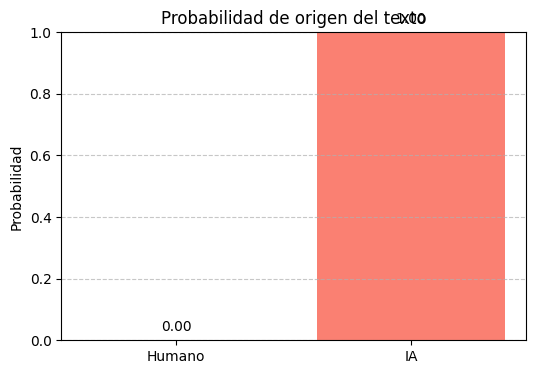

In [21]:
labels = ['Humano', 'IA']
values = [result["Real"], result["Fake"]]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=["skyblue", "salmon"])
plt.ylim(0, 1)
plt.title("Probabilidad de origen del texto")
plt.ylabel("Probabilidad")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.show()
